<a href="https://colab.research.google.com/github/sviteribuben/ML_01/blob/main/PCA_SVD_t_SNE_hw_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 3. Домашнее задание

### 3.1 Задание среднего уровня.

В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [62]:
df_source = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_01/DOPTECHNICS_ML/PCA/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


**В рамках домашнего задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и`traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


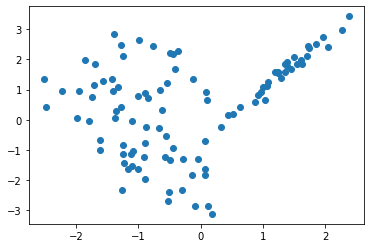

In [ ]:
# -- ВАШ КОД ТУТ --
# Визуализируем первый и третий столбец из набора данных
plt.scatter(X[:, 0], X[:, 2], marker='o')
plt.show()

In [ ]:
# Строим PCA, сжимаем их до одномерного случая
pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[-0.75744517],
       [-2.61154618],
       [ 0.13301346],
       [ 1.74983161],
       [-2.69734129],
       [ 0.70860533],
       [ 1.27113452],
       [-2.16755366],
       [-2.58986361],
       [ 1.6981062 ]])

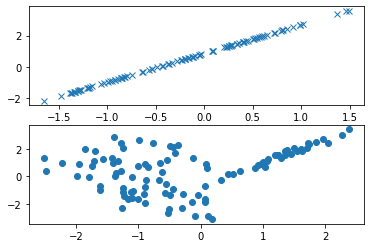

In [ ]:
# Визуализируем результат
# Производим обратное преобразование из одномерного массива в двумерный
X_new = pca.inverse_transform(X_pca)

plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:, 0], X_new[:, 2], 'x')

plt.subplot(212)
plt.plot(X[:, 0], X[:, 2], 'o')
plt.show()

### 3.2 Задание высокого уровня

Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.

Для наглядности и визуализируем наши трёхмерные данные в 3D:

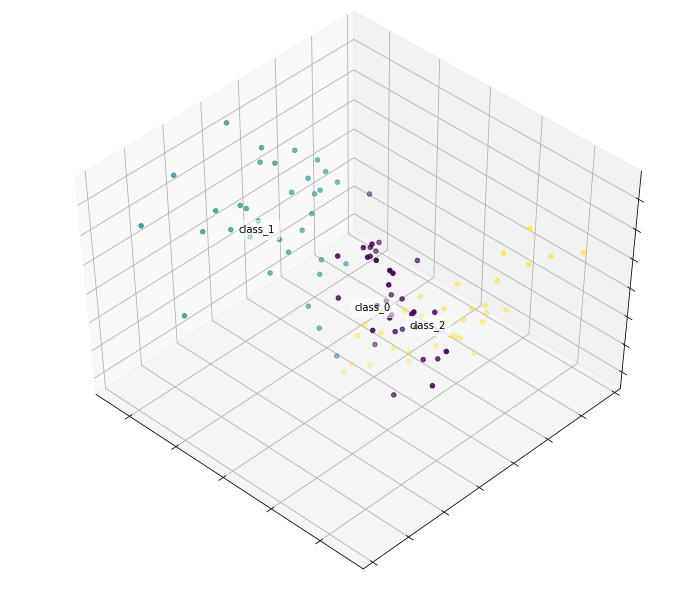

In [ ]:
# и визуализируем их
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); 
plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]);\
ax.w_yaxis.set_ticklabels([]); \
ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:<br>
![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)

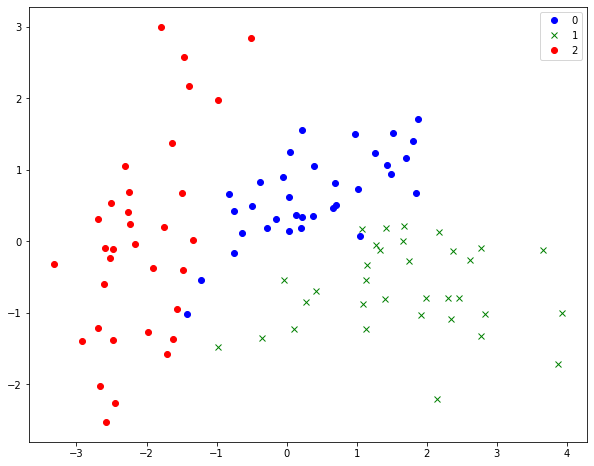

In [ ]:
# -- ВАШ КОД ТУТ --
# Понижение размерности признакового пространства n=2
pca = PCA(n_components=2).fit(X)
X_pca = pca.transform(X)
# gx - выделение зеленых крестов like a lector
colors = ['bo', 'gx', 'ro']
num_labels = len(colors)
fig = plt.figure(1, figsize=(10, 8))
# воспользуемсся примером кода лектора, добавив туда цвет
for name, label, color in [('class_%d' % i, i, colors[i]) \
                           for i in range(num_labels)]:
    plt.plot(X_pca[y == label, 0], X_pca[y == label, 1], color, label=label)
plt.legend(loc=0)
plt.show();

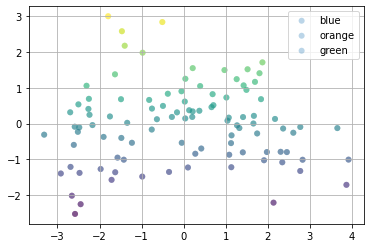

In [ ]:
# fig, ax = plt.subplots()
# for color in ['blue', 'orange', 'green']:    
#     ax.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y,  label=color,
#                alpha=0.3, edgecolors='none')
# ax.legend()
# ax.grid(True)
# plt.show()

В этом уроке мы научились применять алгоритм PCA  понизили размерность датасета с $n=2$ до $n=1$.

В следующем уроке мы реализуем алгоритм PCA на языке python по шагам.

## Урок 6. Домашнее задание 

### 6.1 Задание начального уровня

**Задание просто уровня** Дана матрица $A$, вычислите SVD разложение с помощью функции `numpy.linalg.svd`. Найдите [определитель](https://ru.wikipedia.org/wiki/Определитель ) матрицы $U$ с помощью функции `numpy.linalg.det`. Чему равен определитель?

In [25]:
from numpy.linalg import svd, det

A = np.array([[3,2,2],[2,3,-2]])

# -- ВАШ КОД ТУТ --
svd_A = np.linalg.svd(A, full_matrices=True)
print(f'Размер матрицы: {A.shape} \n\nSVD разложение {svd_A} \n')
try:
  det_A = np.linalg.det(A)
except:
  print('Опеределитель неквадратной матрицы не определн')
# A.shape

Размер матрицы: (2, 3) 

SVD разложение (array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]]), array([5., 3.]), array([[-7.07106781e-01, -7.07106781e-01, -6.47932334e-17],
       [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01],
       [-6.66666667e-01,  6.66666667e-01,  3.33333333e-01]])) 

Опеределитель неквадратной матрицы не определн


### 6.2 Задание высокого уровня

В домашней работе предлагаю Вам немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

<pre>
pip install Pillow
</pre>

Загрузим картинку в трёхмерный *numpy array* и отобразим её прямо в jupyter notebook.

In [26]:
!pip install Pillow

In [27]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg

<class 'numpy.ndarray'> (380, 509, 3)


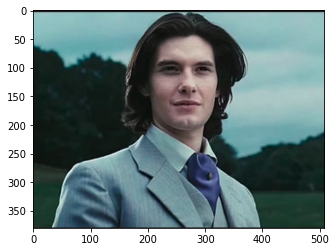

In [30]:
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/ML_01/DOPTECHNICS_ML/PCA/dorian_grey.png')
print(type(img), img.shape)
imshow(img);
plt.show();

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python) 

In [39]:
# from PIL import Image
# img = Image.open('/content/drive/MyDrive/Colab Notebooks/ML_01/DOPTECHNICS_ML/PCA/dorian_grey.png').convert('L')
# img.save('/content/drive/MyDrive/Colab Notebooks/ML_01/DOPTECHNICS_ML/PCA/dorian_grey.jpg')


<class 'numpy.ndarray'> (380, 509)


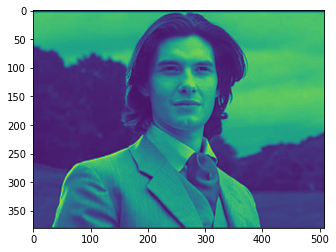

In [40]:
# img_g = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/ML_01/DOPTECHNICS_ML/PCA/dorian_grey.jpg')
# print(type(img_g), img_g.shape)
# imshow(img_g);
# plt.show();

<class 'numpy.ndarray'> (380, 509)


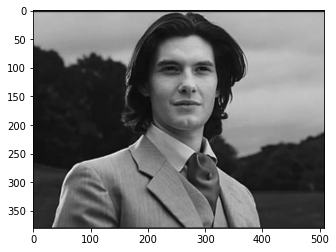

In [32]:
def rgb2gray(rgb):
  ''' Берётся среднее трёх цветов RGB'''
  tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1], 1))
  return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

In [53]:
X = np.array(img_gray)
X.shape

(380, 509)

<class 'numpy.ndarray'> (380, 509)


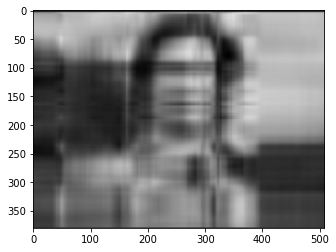

In [60]:
# обучите на массиве img_gray размерности 380, 509
# класс TruncatedSVD c параметром n_components=5
svd_model = TruncatedSVD(n_components=5, random_state=42).fit(X)
# Плучаем матрицу img_gray_svd с помощью функции transform
img_gray_svd = svd_model.transform(X)
# Получаем массив img_gray_svd_restored с помощью функции inverse_transform
img_gray_svd_restored = svd_model.inverse_transform(img_gray_svd)
# Визуализируем массив img_gray_svd_restored с помощью функции imshow
print(type(img_gray_svd_restored), img_gray_svd_restored.shape)
imshow(img_gray_svd_restored, cmap = "gray");
plt.show();

Далее 

* обучите на массиве *img_gray* размерности $894 \times 588$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должна получится фотка как бы в очень нечётком виде

![grey_pca.png](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/grey_pca.png)

В этом уроке мы познакомились с таким способом снижения размерности, как PCA. Оба метода которые мы же значем выполняют сжатие как линейное преобразование. В следующем уроке рассмотрим нелинейное сжатие

<class 'numpy.ndarray'> (380, 509)


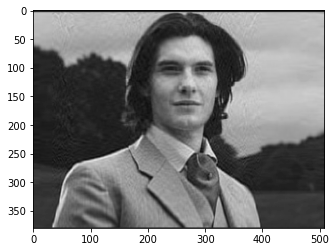

In [59]:
# обучите на массиве img_gray размерности 380, 509
# класс TruncatedSVD c параметром n_components=5
svd_model = TruncatedSVD(n_components=50, random_state=5,\
                         algorithm='arpack').fit(X)
# Плучаем матрицу img_gray_svd с помощью функции transform
img_gray_svd = svd_model.transform(X)
# Получаем массив img_gray_svd_restored с помощью функции inverse_transform
img_gray_svd_restored = svd_model.inverse_transform(img_gray_svd)
# Визуализируем массив img_gray_svd_restored с помощью функции imshow
print(type(img_gray_svd_restored), img_gray_svd_restored.shape)
imshow(img_gray_svd_restored, cmap = "gray",);
plt.show();

## Урок 8. Домашнее задание 
### 8.1 Задание высокого уровня

Давайте проверим, как t-sne может улучшить Ваши модели. Для начала загрузим данные и построим Baseline модель без преобразования входных данных

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [70]:
df_source = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_01/DOPTECHNICS_ML/PCA/client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

In [64]:
def eval_model(input_x, input_y):
    """Обучаем и валидируем модель"""
    X_train, X_test, y_train, y_test = train_test_split(
        input_x, input_y, test_size=.3, stratify=y, random_state=42
    )
    # Для примера возьмём неглубокое дерево решений
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    acc_score = accuracy_score(y_test, preds.argmax(axis=1))
    print('Accuracy: %.5f' % acc_score)

Вычисляем скор baseline модели (по тестовым данным)

In [65]:
eval_model(X, y)

Accuracy: 0.80000


In [69]:
# PCA преобразование матрицы X
pca = PCA(n_components=2, random_state=42).fit(X)
X_pca = pca.transform(X)
eval_model(X_pca, y)

Accuracy: 0.83333


In [71]:
# t-sne преобразование матрицы X
tsne_transformer = TSNE(n_components=2, random_state=42, n_jobs=-1)
x_tsne = tsne_transformer.fit_transform(X)

eval_model(x_tsne, y)

Accuracy: 0.86667


### Вывод - точность предстаказний растет после преобразования снижения размерности. Значит удаление фичей с парной корреляцией идет на пользу для модели. Наибольший результат дает **t-SNE преобразование**.  

Алгоритм выполнения домашней работы:

* выполните PCA преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?
* выполните t-sne преобразование матрицы $X$, передайте новую матрицу в `eval_model`. Какое значение Accuracy получили?

Какие выводы можно сделать?

В этом уроке мы познакомились с новым алгоритмом t-SNE. Какие у него есть недостатки?

* требует бережной настройки параметров на валидационной выборке (см. документацию - там очень много параметров)
* плохо работает, когда данных очень много.

На больших объёмах данных (более 10к элементов) следует применять более простые алгоритмы - PCA или SVD.